In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

This is programming assignment for week 5. In this assignment you will be solving classification task. 

### Grading
The assignment contains both automatically graded and peer reviewed tasks. 

**Automatic grading**\
After you finish solving all the tasks restart the kernel (`kernel -> restart`) and and click button `Validate` to check that everything works as expected. Afterwards, you can submit your work.


**Competition**\
In the second part of the assignment you are asked to train the model with the best score on test dataset. Note, that you are not given correct answers on the test dataset. To get your score, use Kaggle competition, that we've created for you. **The score on the Kaggle liderboard will not affect your grade, instead you need to submit your best result to the separate programming assignment `Predictions on the test set.`** This task is considered passed if your $F_1$ score on the test is larger than 0.7. But we encourage you to try and get larger scores, you can definitely do it:)


**Peer Review**\
Some of the tasks cannot be checked automatically,  therefore, we'll be using peer review. Please, download this notebook with solutions (`File → Download as → Notebook (.ipynb)`) and submit it for peer review. Each peer reviewed task contains grading instructions. 



# Table of Contents:
* [Part1.](#part1) Decision Trees
 - [Task 1](#task1)[1 pt]
 - [Task 2](#task2)[1 pt]
 - [Task 3](#task3)[Peer Review]
* [Part2.](#part2) Competition! [Peer Review]
    

## Part 1. Let's train some decision trees. <a class="anchor" id="part1"></a>

In this part, we will do the simplest preprocessig of the dataset and train decision trees. In the task, you are supposed to predict whether income of a person exceeds \$50K/year. The target variable is equal to `1` if a person earns > \$50k/year and `0` otherwise. 

As an evaluation criterion, we will be using $F_1$score. As you know, it is a weighted average of precision and recall. We are not using accuracy, because the dataset is imbalanced. 

In [57]:
train_data = pd.read_csv('week5_train.csv')
train_data.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0


In [3]:
from sklearn.model_selection import train_test_split

tr, val = train_test_split(train_data, test_size=0.4, random_state=42)

y_train = tr.target
y_valid = val.target
X_train = tr.drop(['target'], axis=1)
X_valid = val.drop(['target'], axis=1)

<a class="anchor" id="task1"></a>

---
**Task 1** [1 pt] Create `column_transformer` which has the following steps:
- fills all the missing values 
- encodes all the categorical features using OHE 
- scales numerical features.

P.S. note, that you'll have to import all the required modules yourself.

In [59]:
# your code here
num_cols = X_train.columns[(X_train.dtypes == "int64") |(X_train.dtypes == "float64")].tolist()
cat_cols = X_train.columns[X_train.dtypes == "object"].tolist()

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipe = make_pipeline(SimpleImputer(), StandardScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(handle_unknown = 'ignore'))

column_transformer = ColumnTransformer([
    ('num_pipe', num_pipe, num_cols),
    ('cat_pipe', cat_pipe, cat_cols)
], remainder = 'passthrough')

In [ ]:
num_cols

In [ ]:
cat_cols

In [6]:
X_transformed = column_transformer.fit_transform(X_train)
X_transformed.shape

X_transformed = column_transformer.fit_transform(X_train)
assert X_transformed.shape[0] == 19536
assert X_transformed.shape[1] == 104

<a class="anchor" id="task2"></a>

---
**Task 2** [1 pt] Create a function `tree_pipe`, which given a maximal tree depth returns a pipeline with two steps:

1. Column transformer (defined above)
2. DecisionTreeClassfier with the required `max_depth` parameter

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline

def tree_pipe(max_depth):
    # your code here
    pipeline = Pipeline([
    ("col_transformer", column_transformer),
    ("estimator", DecisionTreeClassifier(max_depth = max_depth))
]
)
    return pipeline

In [8]:
test_pipe = tree_pipe(1)

test_pipe = tree_pipe(12)
tree = test_pipe.steps[1][1]
assert tree.max_depth == 12

<a class="anchor" id="task3"></a>

---
**Task 3** [Peer Reviewed] Fit decision trees of different depth (from 1 to 100) using the function from the **task 2**. For each depth calculate $F_1$score on the train and validation datasets. Draw a plot, how both scores depend on the maximal tree depth

In [9]:
from sklearn.metrics import f1_score

validation = []
train = []

# your code here
for i in range(1, 101):
    model = tree_pipe(i)
    model.fit(X_train, y_train)
    
    predicted_train = model.predict(X_train)
    predicted_val = model.predict(X_valid)
    
    f1_train = f1_score(y_train, predicted_train)
    f1_val = f1_score(y_valid, predicted_val)
    
    validation.append(f1_val)
    train.append(f1_train)

In [ ]:
pass

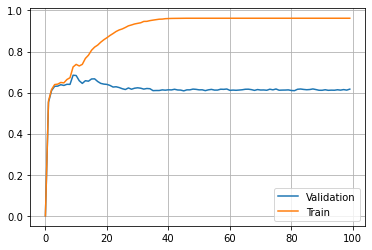

In [10]:
plt.plot(validation, label = 'Validation')
plt.plot(train, label = 'Train')
plt.grid()
plt.legend()

**Peer Review Grading.** Please check that the plot above is correct (below you can see the correct answer).

<img src="Correct_f1.png" width=400 height=400 />


---

## Part 2. Let's compete. <a class="anchor" id="part2"></a>

In this second part of the assignment your task will be straightforward: achieve the best possible score on the test set. To make everything fair, we will be using [Kaggle competition](https://www.kaggle.com/c/predict-income-group). 

At this stage you are free to use any models or preprocessing methods you want. You can use assignemnts from the previous weeks as an inspiration!

Below you can see how the test dataset can be loaded.  

In [58]:
test_data = pd.read_csv('week5_test.csv')
test_data.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


Even though we do not restrict you a lot in this task, we still ask you to stick to the following steps, which will be graded by your peers

**Peer Review Grading.** Below you will find the list of criteria for peer review:
1. Consider categorical features. Show which feature are categorical, check if all the categories are reasonable. Provide plots.
2. Consider numerical features
3. Fill missing values. 
4. Explore different hyperparameters of the decision trees (not only `max_depth`)
5. Choose the best model using cross-validation or just validation
6. Make a prediction on the test set.
7. Try to make your code readable. Do not forget to leave comments.

In [ ]:
# YOUR PREPROCESSING AND MODELS HERE

# Explore Target
Let us plot bar plot for target variable.

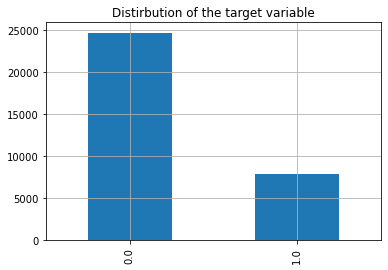

In [34]:
train_data.target.value_counts().plot(kind = 'bar')
plt.grid()
plt.title('Distirbution of the target variable');

# Explore Categorical Features

In [35]:
train_data[cat_cols].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


Note that column native_country has most unique values, we will drop native_country.

In [36]:
#Let's explore the value counts of education column
train_data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

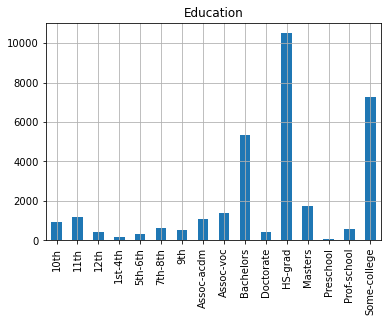

In [37]:
train_data.education.value_counts().sort_index().plot(kind='bar')
plt.title('Education')
plt.grid()

In [ ]:
# test_data['education_1'] = np.where((test_data['education'] == 'Bachelors')|(test_data['education'] == 'Some-college')|(test_data['education'] == 'Doctorate')| (test_data['education'] == 'Masters'), 1, 0)
# test_data['education_2'] = np.where((test_data['education'] == 'HS-grad')|(test_data['education'] == '12th'), 1, 0)
# test_data['education_3'] = np.where((test_data['education'] == '10th') | (test_data['education'] == '11th')|(test_data['education'] == '1st-4th')|(test_data['education'] == '5th-6th')|(test_data['education']=='7th-8th')|(test_data['education'] == '9th')|(test_data['education'] == 'Assoc-acdm')|(test_data['education'] == 'Assoc-voc')|(test_data['education'] =='Preschool') |(test_data['education'] == 'Prof-school'),1, 0)

In [38]:
train_data['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [39]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

Text(0, 0.5, 'Prop. target = 1')

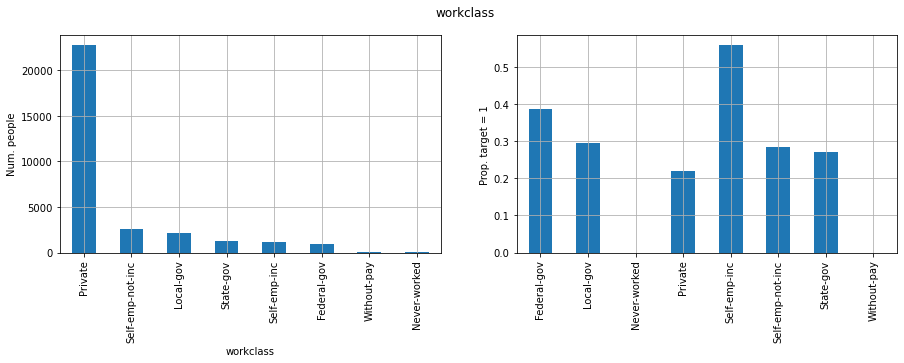

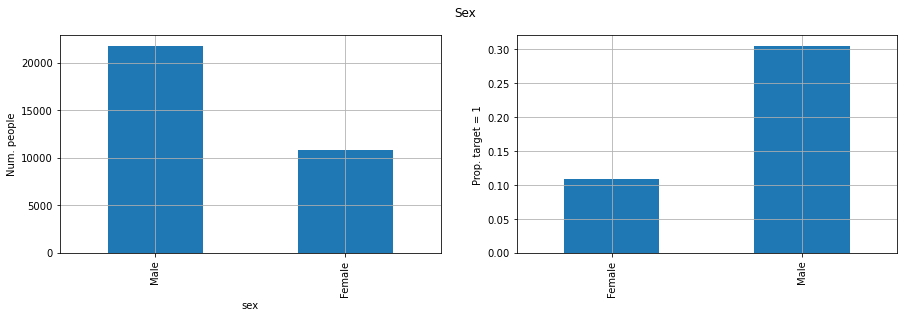

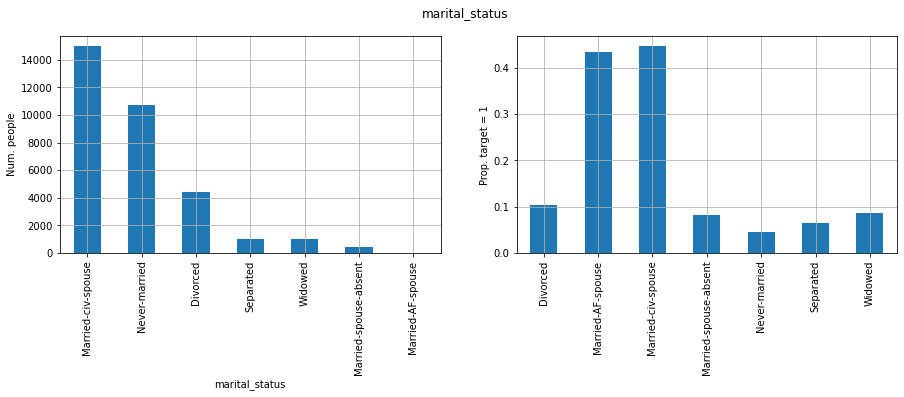

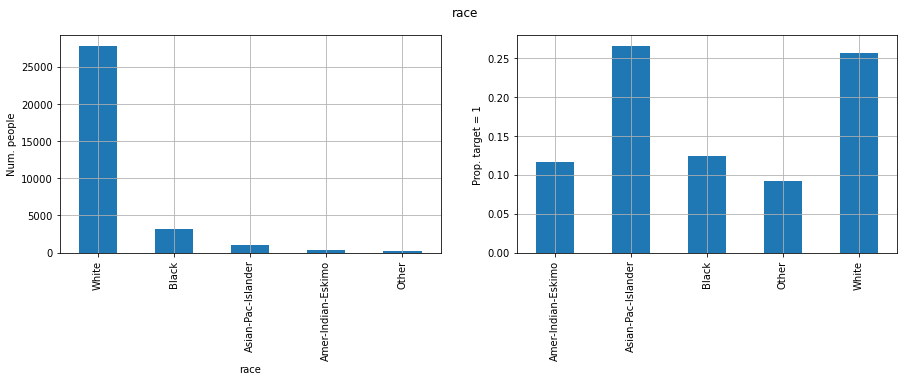

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))
fig.suptitle('workclass')
workclass_total = train_data[train_data['target'] == 1].workclass.value_counts().sort_index(ascending = False)
plt.sca(ax1) 
train_data.groupby(['workclass']).count()['target'].sort_values(ascending = False).plot(kind = 'bar', grid = True);
ax1.set_ylabel('Num. people')
plt.sca(ax2) 
(workclass_total/train_data.groupby(['workclass']).count()['target']).sort_index().plot(kind = 'bar', grid = True);
ax2.set_ylabel('Prop. target = 1')
# ax2.plot(x, -y)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,4))
fig.suptitle('Sex')
sex_total = train_data[train_data['target'] == 1].sex.value_counts().sort_index(ascending = False)
plt.sca(ax1)
train_data.groupby(['sex']).count()['target'].sort_values(ascending = False).plot(kind = 'bar', grid = True)
ax1.set_ylabel('Num. people')
plt.sca(ax2)
(sex_total/train_data.groupby(['sex']).count()['target']).sort_index().plot(kind = 'bar', grid = True)
ax2.set_ylabel('Prop. target = 1')

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,4))
fig.suptitle('marital_status')
marital_total = train_data[train_data['target'] == 1]['marital_status'].value_counts().sort_index(ascending = False)
plt.sca(ax1)
train_data.groupby(['marital_status']).count()['target'].sort_values(ascending = False).plot(kind = 'bar', grid = True)
ax1.set_ylabel('Num. people')
plt.sca(ax2)
(marital_total/train_data.groupby(['marital_status']).count()['target']).sort_index().plot(kind = 'bar', grid = True)
ax2.set_ylabel('Prop. target = 1')

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,4))
fig.suptitle('race')
race_total = train_data[train_data['target'] == 1].race.value_counts().sort_index(ascending = False)
plt.sca(ax1)
train_data.groupby(['race']).count()['target'].sort_values(ascending = False).plot(kind = 'bar', grid = True)
ax1.set_ylabel('Num. people')
plt.sca(ax2)
(race_total/train_data.groupby(['race']).count()['target']).sort_index().plot(kind = 'bar', grid = True)
ax2.set_ylabel('Prop. target = 1')

# Explore Numerical Features

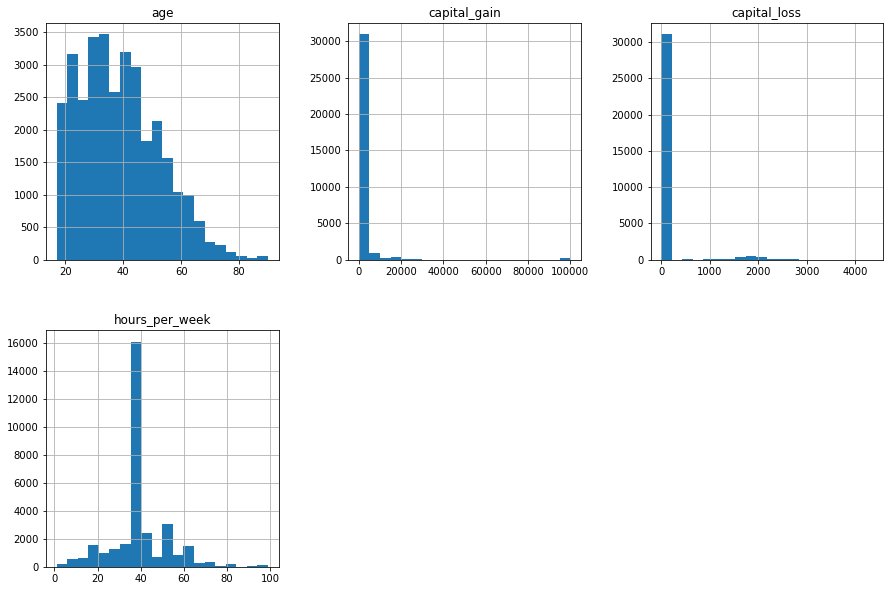

In [41]:
train_data[num_cols].hist(bins=20, grid=True, figsize=(15, 10), layout=(2, 3))
plt.show()

In [ ]:
# Do not forget to save your predictions on test and submit them on Kaggle

# Define Column Transformer

In [61]:
column_transformer = ColumnTransformer([
    ('num_pipe', num_pipe, num_cols),
    ('cat_pipe', cat_pipe, cat_cols)
])

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
boosting_pipe = Pipeline([
    ("col_transformer", column_transformer),
    ("estimator", GradientBoostingClassifier())
])

In [62]:
from xgboost import XGBClassifier
xgb_pipe = Pipeline([
    ("col_transformer", column_transformer),
    ("estimator", XGBClassifier(learning_rate=0.02, n_estimators=100))
])

In [63]:
X_train = train_data.drop(columns = ['target'])

In [65]:
boosting_pipe.fit(X_train, train_data.target)

Pipeline(memory=None,
         steps=[('col_transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_pipe',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                 

In [46]:
predicted_train = boosting_pipe.predict(X_train)
    
f1_train = f1_score(train_data.target, predicted_train)

In [47]:
f1_train

0.6786057870199068

In [48]:
X_train.columns

Index(['age', 'workclass', 'education', 'education_years', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [31]:
test_data.columns

Index(['age', 'workclass', 'education', 'education_years', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [49]:
predicted = boosting_pipe.predict(test_data)

In [50]:
predicted

array([0., 0., 0., ..., 1., 0., 1.])

In [ ]:
f1_train

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "estimator__learning_rate": [0.1],
    "estimator__max_depth":[8],
    "estimator__n_estimators":[100]
}

grid_pipe = GridSearchCV(boosting_pipe,param_grid = param_grid, cv = 5, scoring = "f1")
grid_pipe.fit(X_train, train_data.target)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('col_transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_pipe',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                      

In [77]:
print(grid_pipe.best_score_)

0.7115549113914408


In [78]:
predicted = grid_pipe.predict(test_data)

In [80]:
predicted = predicted.astype('int')
predicted

array([0, 0, 0, ..., 1, 0, 1])

Below you can see, how `csv` file with the prediction can be created and saved. This file can be later used to upload to Kaggle. Please note, that type of the prediction should be `integer`. 

In [81]:
# sample_prediction = np.ones(test_data.shape[0], dtype=int)
sample_prediction = predicted
pd.DataFrame({'Prediction': sample_prediction}).to_csv('my_prediction.csv')

In [82]:
df = pd.read_csv('my_prediction.csv')
df

,Unnamed: 0,Prediction
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
16276,16276,0
16277,16277,0
16278,16278,1
16279,16279,0


In [53]:
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)
df

,id,Prediction
0,0,0.0
1,1,0.0
2,2,0.0
3,3,1.0
4,4,0.0
...,...,...
16276,16276,0.0
16277,16277,0.0
16278,16278,1.0
16279,16279,0.0


In [55]:
df['Prediction'] = df['Prediction'].astype('int')
df

,id,Prediction
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
16276,16276,0
16277,16277,0
16278,16278,1
16279,16279,0


Do not forget to submit your best prediction to the `Predictions on the test set.` programming assignment!

This file will be saved to 

1. Click the Jupyter logo on the top left corner, which will take you to the file tree view.
2. Go to the `release/week5` folder, the file `'my_prediction.csv'` should already be there. If not, make sure that you've ran the cell above.
3. When you select this file using a tick box, the bottomn `Download` will appear on the top panel. Use it to download the file.